In [1]:
from winpy import WinTools, save_as_csv
import obspy
from pathlib import Path
from glob import glob
import os
import numpy as np

In [2]:
wt = WinTools()
filepath = Path(r'D:\Geophysic\EarthScienceData\202505\13')
hourlist = sorted(os.listdir(filepath))
mindata = []
for hour in hourlist:
    # if hour == '15':
    #     continue
    mindata.extend([glob(str(filepath/hour/'*'))])
mindata = sum(mindata, [])
# print(hourlist, mindata)
st = obspy.Stream()
for data in mindata:
    st += wt.read(data)
st.merge()
# st.plot()
# st.decimate(10)
for tr in st:
    tr.data = np.ma.filled(tr.data, fill_value=0.0)
print(st)

save_as_csv(r'D:\Geophysic\EarthScienceData\20250513_all_100Hz.csv', st, decimate=1)

4 Trace(s) in Stream:
...f100 | 2025-05-13T14:37:18.000000Z - 2025-05-13T16:00:15.990000Z | 100.0 Hz, 497800 samples
...f101 | 2025-05-13T14:37:18.000000Z - 2025-05-13T16:00:15.990000Z | 100.0 Hz, 497800 samples
...f102 | 2025-05-13T14:37:18.000000Z - 2025-05-13T16:00:15.990000Z | 100.0 Hz, 497800 samples
...f103 | 2025-05-13T14:37:18.000000Z - 2025-05-13T16:00:15.990000Z | 100.0 Hz, 497800 samples


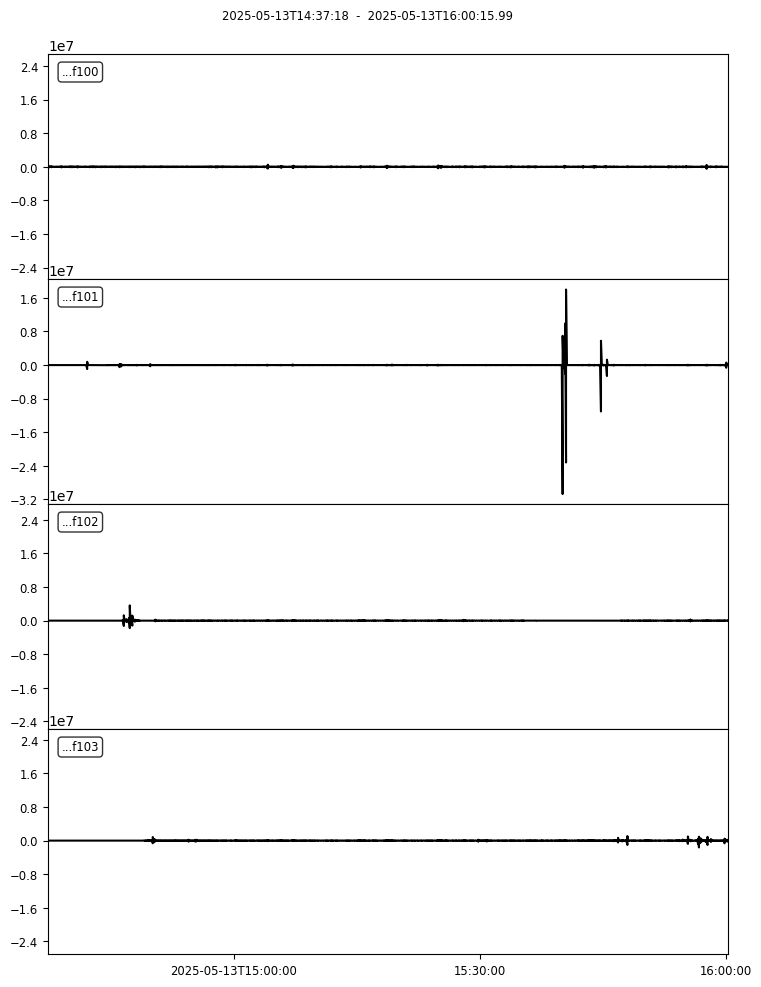

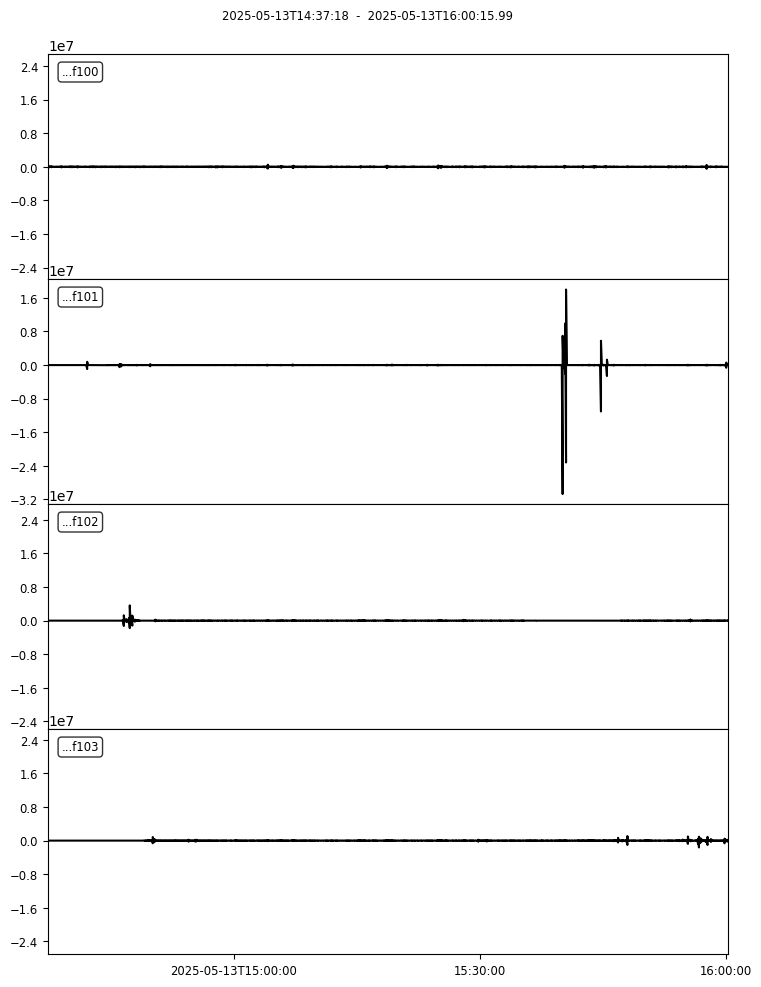

In [3]:
st.plot(starttime=st[0].stats.starttime)